# Probability and Statistics

Probability distributions and statistical arguments are of fundamental importance in all branches of physics. Examples include: 
- **Statistical Mechanics** probability distributions are used to conceptualize and describe the aggregate the behavior of large numbers of particles (molecules in a gas) where it would it be impractical to track the behavior of each individual particle.  

- **Quantum Mechanics** probability distributions describe the likelihood of finding a particle in a particular state.

- **Astrophysics** All structure in the universe is the result of the interplay between gravity and the initial conditions of the universe. The Universe's large scale structure and its initial conditions are described with probability distributions. Statistical methods are used to measure, analyze, and interpret the distribution of matter in the Universe.

- **Particle Physics** Experiments involving particle collisions use statistical methods to interpret and analyze data. Probability is crucial in the identification of particles and the verification of new particle discoveries.

- **Nuclear Physics** Nuclear reactions and decay processes are described using probability distributions.

- **Condensed Matter Physics** Statistical methods are used to describe the behavior of large numbers of particles in a solid or liquid.

- **Experimental Physics and Observational Astronomy** Statistical methods are used to analyze data from experiments/observations, determine whether physical models are consistent with such data, and to determine the significance of experimental/observational results.

## Probability Distributions

In the last homework you analyzed household income data from the [American Community Survey](https://www.census.gov/programs-surveys/acs) (ACS) conducted by the United States Census Bureau. Using this data we constructed and plotted histograms of household income, as shown below. 

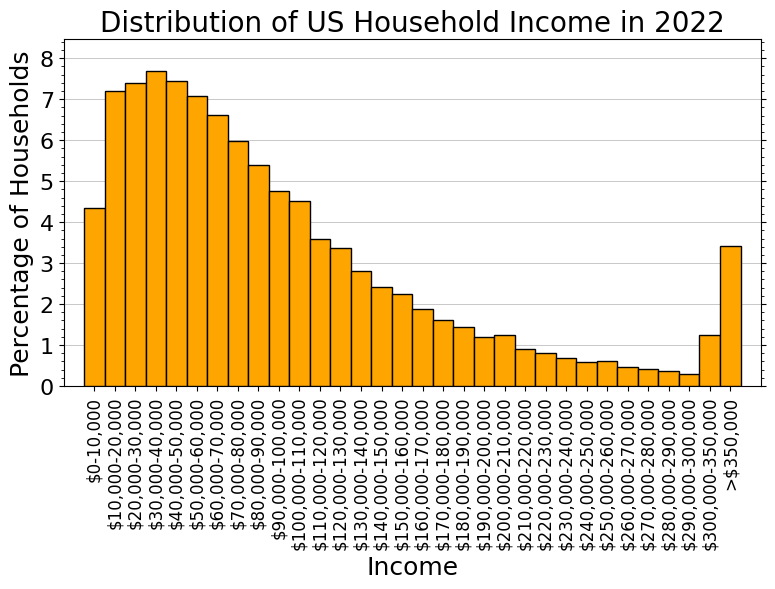

In [1]:
from census_utils import plot_census_data, generate_fake_census_data
plot_census_data()

The histogram above shows the distribution of household income in the United States in 2022. The data is binned into bins of width $\Delta I = \$20,000$ from $\$0$ to $\$300,000$, and the histogram indicates the percentage of households in each bin. To make the high-income *tail* of this distribution easier to visualize, I've chosen the last two bins to be wider: the second to last bin is from $\$300,000$ to $\$350,000$, and the last bin includes all incomes larger than $\$350,000$. 

The input data for this histogram is a list of incomes, $i_j$ for the $N_{\rm tot} = 127,970,381$ households in the United States (with income $> 0$), where $j=1,2,3,..., N_{\rm tot}$ (the average size of a US household is 2.3 people, according to this dataset).   Here $i_j$ is a continuous variable that can take on any value, whereas the centers of the histogram bins, which we will denote as $I_k$, are discrete. 

Let's  compute the histogram  over the full range of the data (i.e. without the two wider bins at the end) and use it to frame our discussion of proability distributions. You know from the homework that the real data was not a list of incomes for all $127,970,381$ housholds in the United States, but rather a shorter list of records with weights that indicate the number of households that each record represents. For the purposes of the discussion here, I've 
written code to generate a fake list of $N_{\rm tot}= 1,000,000$ incomes (without the weights) drawn from the distribution of the real data.

In [2]:
import numpy as np
incomes = generate_fake_census_data()
N_tot = len(incomes)
print(N_tot)

1000000


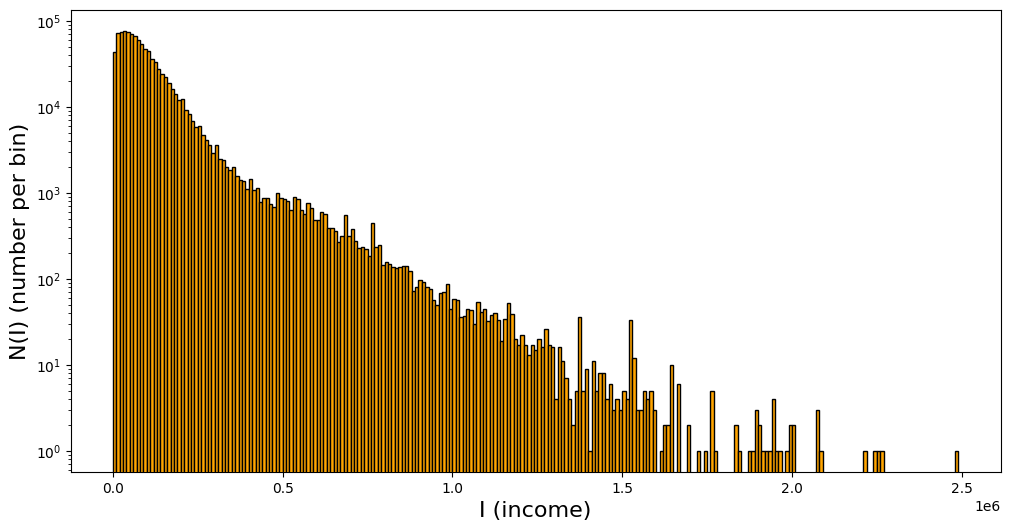

In [3]:
from matplotlib import pyplot as plt
# Construct the bins
bin_width = 10000
# Maximum value is 2,481,200, so go up to 2.5 million
I_edges = np.arange(0, 2500000, bin_width)

# Compute the histogram. Use the weights argument given how the census data is provided. 
N_of_I, _ = np.histogram(incomes, bins=I_edges)
I_centers = (I_edges[1:] + I_edges[:-1])/2

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(I_edges[:-1], N_of_I, width=np.diff(I_edges), align='edge', color='orange', alpha=1.0, edgecolor='black', zorder=10)
plt.xlabel('I (income)', fontsize=16)
plt.ylabel('N(I) (number per bin)', fontsize=16)
plt.yscale('log')

Each histogram bin $k$ contains the number of households, $N(I_k)$, with income $i_j$ in the range $I_k - \Delta I/2 \leq i_j < I_k + \Delta I/2$, where $I_k$ is the center of the bin. The total number of households is then
<a id='eqn:N_tot'></a>
$$
N_{\rm tot} = \sum_{k=0}^{N_{\rm bins}-1} N(I_k) \tag{1},
$$
where $N_{\rm bins}$ is the number of bins in the histogram.

In [4]:
# Double check that we our histogram includes all the data
assert np.sum(N_of_I) == N_tot

### Mean, Median, and Mode

The mean income $\langle i \rangle$ is the average income over all households, 
$$
\langle i \rangle = \frac{1}{N_{\rm tot}} \sum_{j=0}^{N_{\rm tot-1}} i_j \simeq \frac{1}{N_{\rm tot}} \sum_{k=0}^{N_{\rm bins}-1} I_k N(I_k) = \langle I\rangle,
$$
where the second equality is an approximation since $i_j$ is a continuous quantity, whereas the $I_k$ are discrete. In the limit that $\Delta I \rightarrow 0$, the approximation becomes exact and $\langle i \rangle = \langle I\rangle$.

In [23]:
# Two ways to compute the mean
i_bar = np.sum(incomes)/N_tot # see also np.mean(incomes)
I_bar = np.sum(N_of_I*I_centers)/N_tot
print(f'<i> = ${i_bar:.2f} ; <I> = ${I_bar:.2f}')

<i> = $102985.12 ; <I> = $103769.64


We define the relative frequency (probability) of a household having a given income $I_k$ as
$$
P(I_k) = \frac{N(I_k)}{N_{\rm tot}}. 
$$
Note that the probability distribution or distribution function, $P(I_k)$, satisfies the **normalization condition**
$$
\sum_{k=0}^{N_{\rm bins}-1} P(I_k) = \frac{1}{N_{\rm tot}} \sum_{k=0}^{N_{\rm bins}-1} N(I_k) = 1, 
$$
where we have used eqn.(<a href="#eqn:N_tot">1</a>).

In [6]:
P_of_I = N_of_I/N_tot
assert np.isclose(np.sum(P_of_I), 1.0)
print(f'The sum of the probabilities is: {np.sum(P_of_I)}')

The sum of the probabilities is: 0.9999999999999999


So in terms of $P(I_k)$, the mean income is
$$
\langle I\rangle = \sum_{k=0}^{N_{\rm bins}-1} I_k P(I_k).
$$

We can also calculate the mean-square income, $\langle I^2\rangle$, which is the average of the square of the income over all households,
$$
\langle i^2\rangle = \frac{1}{N_{\rm tot}}\sum_{j=0}^{N_{\rm tot}-1} i_j^2 \simeq \sum_{k=0}^{N_{\rm bins}-1} I_k^2 P(I_k) = \langle I^2\rangle,
$$
or taking the square-root, we obtain the **root-mean-square** (RMS) income,
$$
I_{\rm rms} = \sqrt{\langle I^2\rangle}.
$$

A related useful quantity is the **variance** of the income distribution, which is a measure of the spread of the distribution. The variance is defined as
$$
\sigma^2 = \langle (I - \langle I\rangle)^2\rangle = \sum_{k=0}^{N_{\rm bins}-1} (I_k - \langle I\rangle)^2 P(I_k).
$$

Note that by expanding the square in the definition of the variance, we can write
$$
\begin{align*}
{\rm Var}(I) = \sigma^2 & = \sum_{k=0}^{N_{\rm bins}-1} (I_k^2 - 2 \langle I\rangle I_k + \langle I\rangle^2) P(I_k)\\
         &  = \sum_{k=0}^{N_{\rm bins}-1} I_k^2 P(I_k) - 2 \langle I\rangle \sum_{k=0}^{N_{\rm bins}-1} I_k P(I_k) + \langle I\rangle^2 \sum_{k=0}^{N_{\rm bins}-1} P(I_k)\\
        & = \langle I^2\rangle - 2\langle I\rangle^2 + \langle I\rangle^2\\
        &  = \langle I^2\rangle - \langle I\rangle^2.
\end{align*}
$$

The **standard deviation** is the square root of the variance, 
$$
\sigma = \sqrt{\sigma^2} = \sqrt{\langle I^2\rangle - \langle I\rangle^2}.
$$

In [7]:
# Compute the probability distribution P_of_I
P_of_I = (N_of_I/N_tot)
# Two ways to compute the standard deviation 
sigma_i = np.std(incomes) # from the original data
sigma_I = np.sqrt(np.sum(P_of_I*(I_centers - I_bar)**2)) # from the histogram
print(f'sigma_i = ${sigma_i:.2f} ; <I> = ${sigma_I:.2f}')

sigma_i = $113409.95 ; <I> = $113467.93


Another useful quantity for characterizing probability distributions is the **mode**
$$
I_{\rm mode} = \max_k P(I_k),
$$
which is the value of $I_k$ at which the probability distribution is maximized.  This is the most probable value of the income if you randomly draw households from the US population. 

In [8]:
# Compute the mode
k_max = np.argmax(P_of_I)
I_mode = I_centers[k_max]
print(f'The mode of the distribution is: ${I_mode:.2f}')

The mode of the distribution is: $35000.00


### The Cumulative Distribution Function

Another very important quantity is the **cumulative distribution function** (CDF), which is defined by 
$$
{\rm CDF}(\le I_k) = \sum_{k^\prime=0}^{k} P(I_{k^\prime}). 
$$
Since it sums over all $P(I_k)$ for $k^\prime \le k$, the CDF is a measure of the probability that a household has an income less than or equal to $I_k$. For example, for the household income data, if the probability that a household has an income less than or equal to \$128,000 is 75% then ${\rm CDF}(\le \$128,000) = 0.75$. In code, we can compute the CDF using
the `np.cumsum` function in `numpy` as we will show below. 

The **median** is the value of $I_k$ encompassing 50% of the cumulative probability. It is defined by the equation
$$
\sum_{k=0}^{k_{\rm med}} P(I_k) = 0.5 \quad ; \quad I_{\rm k_{\rm med}} \equiv \text{the median income}. 
$$
If we return to the continuous variable $i_j$, the median income is the value of $i_j$ such that 50% of the households have an income less than or equal to this value, which is just the *midpoint* of the list of $i_j$ values when they are sorted in ascending order.

i_median = $73000.00 ; I_median = $75000.00


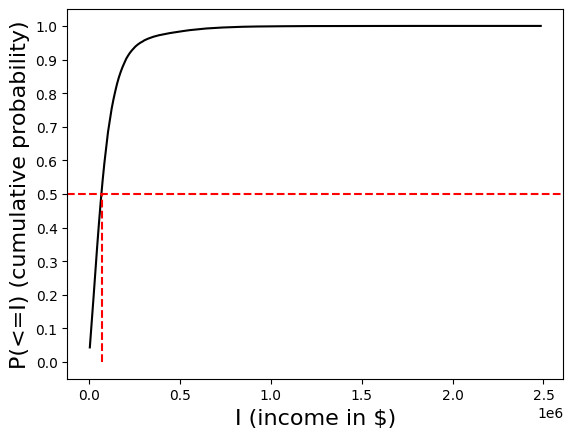

In [24]:
from matplotlib.ticker import MultipleLocator
# Two ways to compute the median
i_median = np.median(incomes) # First way, from the original data
# Second way, from histogram find the bin that contains 50% of the cumulative probability
P_cumulative = np.cumsum(P_of_I) 
# Cumsum means P_cumulative[0] = P_of_I[0], P_cumulative[1] = P_of_I[0] + P_of_I[1], etc.
# Find the first bin where the cumulative probability exceeds 0.5
k_med = np.argmax(P_cumulative > 0.5) # This takes the first element of the array where the condition is true
I_median = I_centers[k_med]
plt.plot(I_centers, P_cumulative, 'k-')
plt.xlabel('I (income in $)', fontsize=16)
plt.ylabel('P(<=I) (cumulative probability)', fontsize=16)
plt.axhline(0.5, color='red', linestyle='--')
plt.plot([i_median, i_median],[0.0, 0.5], color='red', linestyle='--')
# Set the major tick mark spacing on the y-axis to 0.1
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
print(f'i_median = ${i_median:.2f} ; I_median = ${I_median:.2f}')


Notice that the mean and median of the US household income distribution are not the same: 

In [45]:
print(f'The mean=${i_bar:.2f}, whereas the median=${i_median:.2f}')

The mean=$102985.12, whereas the median=$73000.00


The reason for this is that the distribution posseses a large tail of high-income households, which pulls the mean towards higher values relative to the median.

### Discrete vs. Continuous Probability Distributions

In some applications the variable of interest is discrete, for example if we are considering rolling a die, there are six discrete possible outcomes: 1, 2, 3, 4, 5, or 6, but a value of 1.5 is impossible. So the probability distribution would similarly have six 
discrete values, $P(1)$, $P(2)$, $P(3)$, $P(4)$, $P(5)$, and $P(6)$.

In other cases the variable is continuous, for example household incomes, $i_j$, can take on any real number in the range $0 \leq i_j < \infty$. In the example above however, we were dealing with a dataset with a finite number of entires. To visualize the probability distribution of a continuous variable for a finite dataset, we use a histogram, $P(I_k)$, with a finite number of discrete bins. 

Now consider the case of a continuous distribution of some variable $x$. We define $P(x)$ by
$$
N(x) = N_{\rm tot} P(x) \Delta x \quad ; \quad N(x)\propto \Delta x,  
$$
where $N(x)$ is the number of events in the range $x$ to $x+\Delta x$. Clearly in the limit $\Delta x \rightarrow 0$ and $N_{\rm tot} \rightarrow \infty$,  $P(x)$ goes from being a histogram to a continuous function 
$$
P(x) = \lim_{\substack{\Delta x \to 0 \\ N_{\rm tot} \to \infty}} \frac{N(x)}{N_{\rm tot} \Delta x}. 
$$

For continuous probability distributions, the discrete sums then become integrals, i.e. 
$$
\int P(x) dx = 1, \quad \quad \text{normalization condition}.
$$
Note that $P(x)$ is a **probability density** and now has units of $[1/x]$, i.e. $P(x)dx$ is the infinitesimal dimensionless probability of finding $x$ in the range $x$ to $x+dx$.

The mean is now defined by
<a id='eqn:mean'></a>
$$
\langle x\rangle = \int x P(x) dx, \quad \quad \text{mean}, \tag{2}
$$
and likewise the variance is
<a id='eqn:variance'></a>
$$
{\rm Var}(x) = \sigma^2 = \int (x - \langle x\rangle)^2 P(x) dx, \quad \quad \text{variance}. \tag{3}
$$

For a continuous variable defined on the entire  real line, $x \in (-\infty, \infty)$, the CDF then becomes
$$
{\rm CDF}(\le x) = \int_{-\infty}^x P(x^\prime) dx^\prime,
$$
where again ${\rm CDF}(\le x)$ is the probability of encountering a value that is less than or equal to $x$.  

The median of the distribution then becomes
$$
{\rm CDF}(\le x_{\rm med}) = 0.5 \quad ; \quad x_{\rm med} \equiv \text{the median value}.
$$
for the continous case. 

### Common Probability Distributions and Random Sampling

#### The Uniform Distribution 

A very common distribution is the **uniform** distribution, which is defined by a constant probability density  over a range of values. The probability density function for a uniform distribution is given by
$$
U(x|a,b) = 
\begin{cases} 
\frac{1}{b-a} & \text{for } a \leq x < b, \\
0 & \text{otherwise}.
\end{cases}
$$

As we previously discussed in Week5, we can generate pseudo-random numbers from various distributions using the `np.random` module. 

Pseudo-random numbers require a **seed** to start the sequence of numbers. The seed is a number that is used to initialize the random number generator. If you use the same seed, you will get the same sequence of random numbers. If you don't specify a seed, the random number generator will use the current time as the seed, which means that the program you write will generate a different sequence of random numbers each time you run it, and hence any results (or bugs) will not be reproducible. I advise you to always specify a seed. 

In [28]:
# Instantiate the random number generator object with a seed 
seed = 42
rng = np.random.default_rng(seed)
x1 = rng.uniform(low=0.0, high=1.0, size=(10,))
# see also rng.random(10) which generates 'standard' uniform deaviates between 0 and 1
print(x1)
# if we call this generator again, we get 10 more unique values
x2 = rng.uniform(low=0.0, high=1.0, size=(10,))
print(x2)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]
[0.37079802 0.92676499 0.64386512 0.82276161 0.4434142  0.22723872
 0.55458479 0.06381726 0.82763117 0.6316644 ]


In [29]:
# Reinitialize the generator with the same seed gives the same sequence
seed = 42
rng = np.random.default_rng(seed)
x_reinit = rng.uniform(low=0.0, high=1.0, size=(20,))
print(x_reinit)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
 0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
 0.82763117 0.6316644 ]


The `scipy.stats` module is very useful for working with probability distributions, although I would not use it to generate random numbers because it does not have as sophisticated an interface for seeding the generators as `np.random`.

a_samp = 0.0000000912462369 ; b_samp = 1.0000000000000000


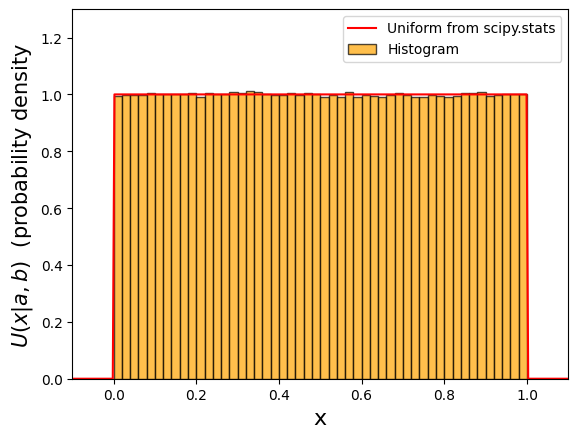

In [38]:
from scipy import stats
import numpy as np

a, b = 0, 1
# Generate random numbers from a uniform distribution
x = np.random.uniform(low=a, high=b, size=(1000000,))

# Print out some stats from our samples 
a_samp, b_samp = np.min(x), np.max(x)
print(f'a_samp = {a_samp:.16f} ; b_samp = {b:.16f}')

# Compute the histogram
bins = np.linspace(-0.2, 1.2, 71)
counts, _ = np.histogram(x, bins=bins, density=True)

# Plot the histogram
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Histogram')

# Compute the uniform distribution function on a finer grid
x_fine = np.linspace(-2, 2, 1000)
uniform = stats.uniform.pdf(x_fine, loc=a, scale=b-a)
# Plot the uniform distribution function
plt.plot(x_fine, uniform, 'r-', label='Uniform from scipy.stats')

# Add labels and legend
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$U(x|a, b)$' + '  (probability density', fontsize=15)
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(0, 1.3)
plt.show()

#### The Gaussian Distribution
By far the most common probability distribution is the **Gaussian** or **normal** distribution also sometimes referred to as the **bell curve**. The probability density function for a Gaussian distribution is given by
$$
\mathcal{N}(x| \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right],
$$
where $\mu$ is the mean of $x$, i.e. $\langle x\rangle$,  $\sigma^2$ is the variance of $x$. 


In [40]:
x_gauss = rng.normal(loc=0.0, scale=1.0, size=(10,))
# See also rng.randn which generates 'standard' normal deviates with mean 0 and standard deviation 1
print(x_gauss)

[-0.53088513 -0.77337641 -1.71479965 -0.26482612 -0.06310849  0.7764607
  0.17335162  0.06190396  0.27865606  0.29470769]


mu = 0.00 ; sigma = 1.00


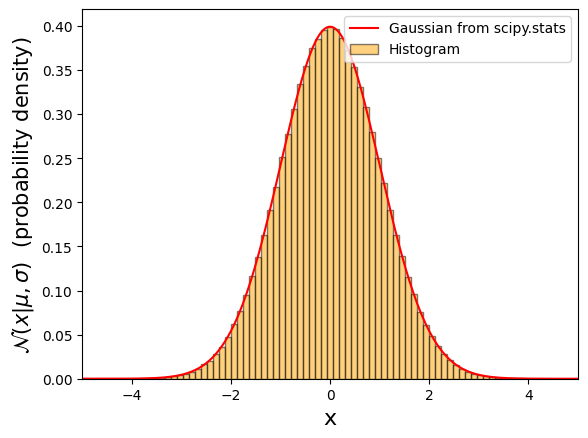

In [41]:
from scipy import stats
import numpy as np

x = rng.normal(loc=0.0, scale=1.0, size=(1000000,))

# Print out some stats from our samples 
mu, sigma = np.mean(x), np.std(x)
print(f'mu = {mu:.2f} ; sigma = {sigma:.2f}')

# Compute the histogram
bins = np.linspace(-6, 6, 100)
counts, _ = np.histogram(x, bins=bins, density=True)

# Plot the histogram
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.5, edgecolor='black', label='Histogram')

# Compute the Gaussian distribution function on a finer grid
x_fine = np.linspace(-6, 6, 1000)
gaussian = stats.norm.pdf(x_fine, loc=mu, scale=sigma)
# Plot the Gaussian distribution function
plt.plot(x_fine, gaussian, 'r-', label='Gaussian from scipy.stats')

# Add labels and legend
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$\mathcal{N}(x|\mu, \sigma)$' + '  (probability density)', fontsize=15)
plt.legend()
plt.xlim(-5, 5)
plt.show()

##### Some Nice Properties of Gaussians

Gaussians have many nice properties that make them very useful in physics and statistics and very easy to manipulate. A few that we will use are: 

- If $x$ is Gaussian distributed with mean $\mu$ and variance $\sigma^2$, then $a x + b$ is also Gaussian distributed with mean $a\mu + b$ and variance $a^2\sigma^2$.

- If $x_1$ and $x_2$ are independent Gaussian random variables with means $\mu_1$ and $\mu_2$ and variances $\sigma_1^2$ and $\sigma_2^2$, then the sum $x_1 + x_2$ is also a Gaussian random variable with mean $\mu_1 + \mu_2$ and variance $\sigma_1^2 + \sigma_2^2$.

- It thus follows that any linear combination of independent Gaussian random variables is also Gaussian with simple rules to 
compute the mean and variance of the resulting distribution.

We will not take the time to prove these properties here, but they are very useful in many applications. We will quickly demonstrate
using code. 

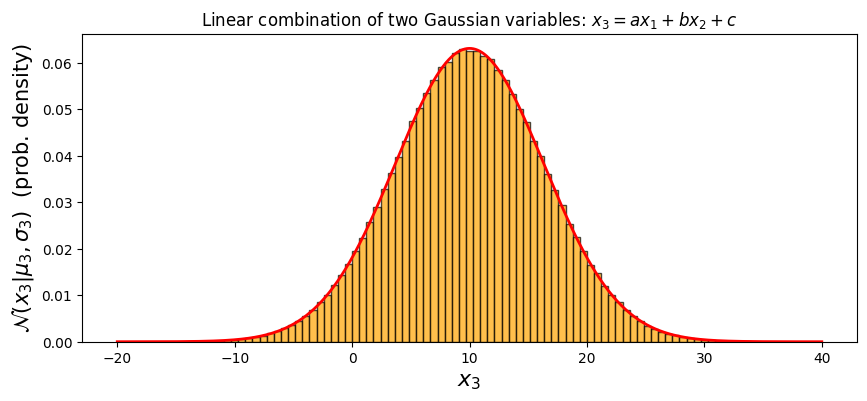

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the seed for reproducibility

# Generate Gaussian distributed random variables
mu1, sigma1 = 0, 1
mu2, sigma2 = 2, 2
x1 = rng.normal(mu1, sigma1, 1000000)
x2 = rng.normal(mu2, sigma2, 1000000)

# Create a linear combination of x1 and x2
a, b, c = 2, 3, 4
x3 = a * x1 + b * x2 + c
mu3 = a * mu1 + b * mu2 + c
sigma3 = np.sqrt(a**2 * sigma1**2 + b**2 * sigma2**2)

# Compute the histogram
bins = np.linspace(-20, 40, 100)
Pofx3, _ = np.histogram(x3, bins=bins, density=True)

# Plot the histogram and the Gaussian distribution function
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the histogram
ax.bar(bins[:-1], Pofx3, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Histogram')

# Compute the Gaussian distribution function on a finer grid
x_fine = np.linspace(-20, 40, 1000)
gaussian = norm.pdf(x_fine, loc=mu3, scale=sigma3)
ax.plot(x_fine, gaussian, 'r', linewidth=2)
ax.set_title(r"Linear combination of two Gaussian variables: $x_3 = a x_1 + b x_2 + c$")

# Add labels and legend
ax.set_xlabel(r'$x_3$', fontsize=16)
ax.set_ylabel(r'$\mathcal{N}(x_3|\mu_3, \sigma_3)$' + '  (prob. density)', fontsize=15)
plt.show()


### Percentiles, Confidence Intervals, and Error Bars

Because the Gaussian distribution is so common, it sets the *standard* for defining percentiles, confidence intervals, and error bars. Going back to the Gaussian with $\mu=0$ and $\sigma=1$, we can use `scipy.stats` to compute the cumulative distribution function. 


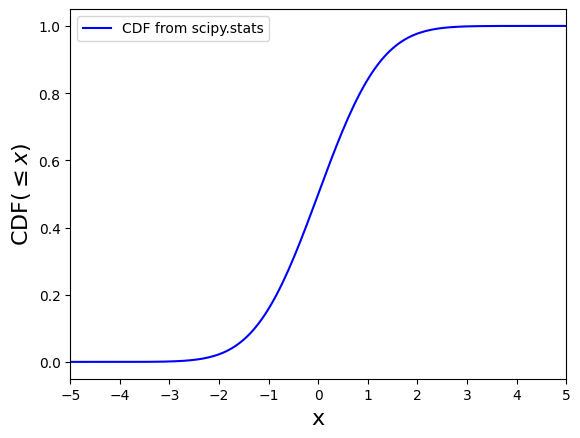

In [16]:
mu =0
sigma = 1.0
# Compute the cumulative distribution function from scipy.stats
cdf_scipy = stats.norm.cdf(x_fine, loc=mu, scale=sigma)

# Plot the cumulative distribution function from scipy.stats
plt.plot(x_fine, cdf_scipy, 'b-', label='CDF from scipy.stats')

# Add labels and legend
plt.xlabel('x', fontsize=16)
plt.ylabel(r'${\rm CDF}(\leq x)$', fontsize=16)
plt.legend()
plt.xlim(-5, 5)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))



As illustrated in the figure below: 
- The mean $\mu$ of the distribuiton is also equal to the median. 
- 68% of the values lie within one standard deviation $\sigma$ of the mean $\mu$.
- 95% of the values lie within two standard deviations $2\sigma$ of $\mu$.
- 99.7% are within three standard deviations $3\sigma$ of $\mu$.

<img src="figures/gaussian_wikipedia.png" width="800">

We can verify these numbers with `scipy.stats` 

In [17]:
from scipy.stats import norm

mu = 0.0
sigma = 1.0

# Create a normal distribution object
dist = norm(loc=mu, scale=sigma)
# Compute the cumulative distribution function of the Gaussian at  mu - sigma and mu + sigma
lower_percentile_16 = 100*dist.cdf(mu - sigma) # 15.9% of the probability below mu - sigma
upper_percentile_84 = 100*dist.cdf(mu + sigma) # 84.1% of the probability below mu + sigma

print(f'The percentile for mu - sigma is: {lower_percentile_16}')
print(f'The percentile for mu + sigma is: {upper_percentile_84}')
print(f'Bewteen mu - sigma and mu + sigma is: {upper_percentile_84 - lower_percentile_16}')

The percentile for mu - sigma is: 15.865525393145708
The percentile for mu + sigma is: 84.1344746068543
Bewteen mu - sigma and mu + sigma is: 68.2689492137086


Even if a distribution is not Gaussian, it is common to use a standard set of confidence levels to describe the spread of the distribution.  For example, consider our US income distribution, which is not Gaussian.  We can nevertheless compute its 16th, 50th, and 84th percentile incomes, to get a feeling for how the distribution behaves. For a Gaussian distribution, the 16th, 50th, and 84th percentiles correspond to the mean/median (they are the same for a Gaussian) minus/plus the standard deviation. This will not be the case for a non-Gaussian distribution like the US income distribution, but we can still compute these percentiles and use them to describe the distribution.

As we saw with computing the median above, we can either compute percentiles directly from a set of random samples (a dataset), or we can compute them via the cumulative distribution function (CDF), i.e. by integrating a probability distribution or summing a histogram.  Here are examples of both: 

In [47]:
# Compute percentiles directly from the data. Use the np.percentile function
income_16 = np.percentile(incomes, lower_percentile_16)
income_50 = np.percentile(incomes, 50.0) # This is equivalent to taking the median
income_84 = np.percentile(incomes, upper_percentile_84)
print(f'16th-50th-84th percentiles from samples: ${income_16:.2f}, ${income_50:.2f}, ${income_84:.2f}')

16th-50th-84th percentiles from samples: $25048.68, $73000.00, $165900.00


In [48]:
# Another way would be to use the cumulative distribution as with the median
P_cumulative = np.cumsum(P_of_I) 
# Cumsum means P_cumulative[0] = P_of_I[0], P_cumulative[1] = P_of_I[0] + P_of_I[1], etc.
k_16 = np.argmax(P_cumulative > lower_percentile_16/100)
k_med = np.argmax(P_cumulative > 0.5) 
k_84 = np.argmax(P_cumulative > upper_percentile_84/100)
I_16 = I_centers[k_16]
I_median = I_centers[k_med]
I_84 = I_centers[k_84]
print(f'16th-50th-84th percentiles from CDF: ${I_16:.2f}, ${I_median:.2f}, ${I_84:.2f}')

16th-50th-84th percentiles from CDF: $25000.00, $75000.00, $165000.00


Finally, these common percentiles provide a standard way for summarizing physical measurements. In Week5 we discussed the idea of making a plot with error bars. 
For example if we make measurements of a quantity ${\hat x}_0$ that is noisy, and the noise follows a Gaussian distribution (a common occurence), that is
$$
P(x_0) = \mathcal{N}(x_0|{\hat x}_0, \sigma_{x_0}), 
$$
where we take $\mu={\hat x}_0$ to be the mean and $\sigma_{x_0}$ is the standard deviation that comes from say our measurement apparatus. 

In this case, a concise summary of our measurement is to write
$$
x_0 = {\hat x}_0 \pm \sigma_{x_0}. 
$$
The $\pm$ is a convention that indicates  the lower 16th and upper 84th percentiles of the variable. Since our distribution is Gaussian, this is equivalent to $\pm$ the standard deviation, 
and futhermore, the 16th and 84th percentiles are symmetric about the mean/median.  The plus and minus values defined in this way are also the **error bars** that you would use if you were plotting such noisy data (see Week5 lecture). Note that in general the 16th and 84th percentiles denoted by the $\pm$ will not always be symmetric about the mean. 

For example, if we imagine the household incomes of the United States as a noisy measurement drawn from the skewed income distribution that we plotted above, based on what we found above for the percentiles, we would write: 
$$
{\rm income} = \$73,000_{-47951}^{+92900}. 
$$
Because the 16th-50th-84th percentiles,  \$25,049, \$73,000, \$165,900.00$, are not symmetric about the median, we thus quote the assymetric error bars in this way. 

### Probability Distributions of Multiple Variables and Statistical Independence

In many cases that arise we are interested in the probability distribution of multiple random variables. For example, in the case of the American Community Survey, we might be interested in the **joint probability distribution** of household income and the number of people in the household $P(I,N)$. 

A related concept to a probability distribution of multiple variables, is a **conditional probability** distribution. The conditional probability is the probability that something occurs given that we know something else has occurred. For example, if we imagine holding the household size fixed at a specific value of $N$ (say $N=1$ person), what is the probability distribution of, $I$, the income for these one person households. You can imagine mapping this conditional income distribution out at each value of $N$. Mathematically, we write this as the conditional probability distribution $P(I|N)$, which is read as *the probability of $I$ given $N$*. 

In general, the joint probability distribution of two variables, $x$ and $y$, is related to the conditional probability by
<a id='eqn:P(x|y)'></a>
$$
P(x,y) = P(x|y)P(y), \tag{4} 
$$
which makes intuitive sense: the probability of $x$ and $y$ occurring together is the probability of $x$ occurring given that $y$ has occurred, times the probability of $y$ occurring. Of course we could also think about it the opposite way, i.e.
<a id='eqn:P(y|x)'></a>
$$
P(x,y) = P(y|x)P(x), \tag{5}
$$
which says: the probability of $x$ and $y$ occurring together is the probability of $y$ occurring given that $x$ has occurred, times the probability of $x$ occurring. 

The two variables $x$ and $y$ are **statistically independent** if the probability distribution of $x$ is not affected by the value of $y$, and vice versa, i.e. 
$$
P(x|y) = P(x) \quad \text{and} \quad P(y|x) = P(y).
$$
Plugging either of these equations into eqns.(<a href="#eqn:P(x|y)">4</a>) or (<a href="#eqn:P(y|x)">5</a>) we see that the joint probability distribution of $x$ and $y$ is the product of the individual probability distributions of $x$ and $y$, i.e.
<a id='eqn:joint'></a>
$$
P(x,y) = P(x)P(y). \tag{4}
$$
Again this makes intuitive sense. If we have two independent dice, the probability of rolling a 3 on one die is not affected by the value of the other die, and vice versa.  Hence the probability of rolling a 3 on both dice is the product of the probability of rolling a 3 on each die individually.

Finally, because of the symmetry of  eqns.(<a href="#eqn:P(x|y)">4</a>) or (<a href="#eqn:P(y|x)">5</a>), we can equate them to arrive at one of the most important results in probability theory, **Bayes' Theorem**:
$$
P(x,y) =  P(x|y)P(y) = P(y|x)P(x) \quad \rightarrow \quad P(x|y) = \frac{P(y|x)P(x)}{P(y)}, 
$$
which forms the foundation of **Bayesian statistics**. We will use Bayes' theorem in a future lecture when we discuss fitting models to data, also known as statistical inference. 

### Properties of the Mean and Variance Operators
An important fact that we will use is that the mean and variance of a random variable are **operators** that satisfy certain properties, *independent of the functional form of the probability distribution*. For example consider a random variable $x$ described by a probability distribution $P(x)$. If $A$ is a constant that does not depend on $x$, then 
$$ 
\langle A \rangle = A \quad \text{and} \quad {\rm Var}(A) = 0, 
$$
which you can easily prove by using the definitions of the mean and variance in eqns.(<a href="#eqn:mean">2</a>) and (<a href="#eqn:variance">3</a>).

In addition, 
$$
\langle A x \rangle = A \langle x \rangle \quad \quad \text{and} \quad \quad {\rm Var}(A x) = A^2 {\rm Var}(x),
$$
These properties follow directly from the definitions above of the mean and variance as sums (or integrals) over the probability distributions. 

Furthermore, if $x$ and $y$ are **statistically independent** random variables, i.e. $P(x,y) = P(x)P(y)$, then it follows that
$$
\langle x + y \rangle = \langle x \rangle + \langle y \rangle \quad \quad \text{and} \quad \quad {\rm Var}(x + y) = {\rm Var}(x) + {\rm Var}(y). 
$$
You will prove these properties in the homework.

### Change of Variables 

Now suppose that we generate a random deviate $x$ and then take some prescirbed function of it, $y(x)$. What is the probability distribution $P(y)$ of the new variable $y$? It is determined by the fundamental transformation rule for probabilities:
$$
P(x)dx = P(y)dy = P(y)\left|\frac{dy}{dx}\right|dx, 
$$ 
or 
$$
P(y) = P(x)\left|\frac{dx}{dy}\right|. 
$$

#### Example: The Exponential Distribution

As an example consider the uniform distribution, $U(x|0,1)$, 
$$
U(x|0,1) = 
\begin{cases} 
1 & \text{for } 0 \leq x < 1, \\
0 & \text{otherwise}.
\end{cases}
$$
and let $y(x) \equiv -\ln(1-x)$. Then 
$$
x(y) = 1 - e^{-y} \quad \text{and} \quad \left|\frac{dx}{dy}\right| = e^{-y},
$$ 
so we get
$$
P(y) = U(x)\left|\frac{dx}{dy}\right| = e^{-y}.
$$
This is the probability distribution of the **exponential distribution**, which occurs in many physical processes, such as the distribution of waiting times between independent random events, for example the radioactive decay of a nucleus. 

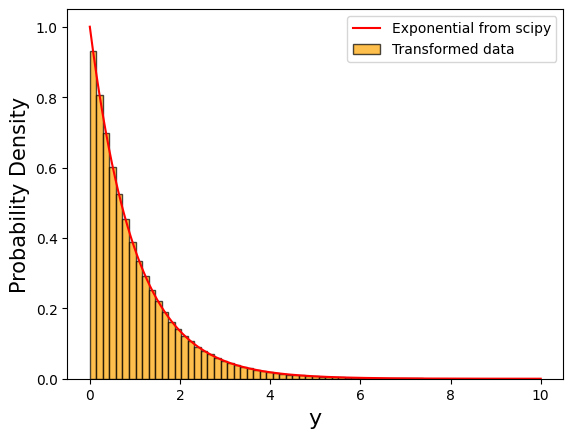

In [49]:
# Generate uniform deviates
x = rng.uniform(0,1, 1000000) 

# Transform the uniform deviates to get an exponential distribution
y = -np.log(1-x)

# Compute the histogram of y
bins = np.linspace(0, 10, 70)
counts, _ = np.histogram(y, bins=bins, density=True)

# Plot the histogram
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Transformed data')

# Compute the exponential distribution function on a finer grid
x_fine = np.linspace(0, 10, 1000)
exponential = stats.expon.pdf(x_fine)

# Plot the exponential distribution function
plt.plot(x_fine, exponential, 'r-', label='Exponential from scipy')

# Add labels and legend
plt.xlabel('y', fontsize=16)
plt.ylabel('Probability Density', fontsize=15)
plt.legend()
plt.show()

### Sampling From an Arbitrary Probability Distribution

Suppose that we want to draw random samples from some arbitrary probability distribution function $P(y)$, for which there is no function in `numpy.random`.  The fundamental transformation rule for probabilities provides a method for acheiving this. Analogous to 
the example for the exponential distribution above, we need to determine the transformation function $y(x)$, which when applied to draws $x$ from the uniform distribution $U(x|0,1)$, will map it to the desired distribution $P(y)$ via
$$
P(y) = U(x)\left|\frac{dx}{dy}\right|.  
$$
Apparently we just need to solve the differential equation 
$$
\frac{dx}{dy} = P(y). 
$$
But the solution to this is 
$$
x(y) = \int P(y) dy + C,  
$$
where $C$ is a constant of integration.  Notice that aside from the integration constant, the right-hand side of this equation is the cumulative distribution function (CDF) of $P(y)$. Imagine that $y$ is defined on some domain $y \in (a, b)$, then we can impose the
boundary condition that $x(y=a) = 0$, since the ${\rm CDF}(\leq a) = 0$, allowing us to eliminate the constant of integration. Thus
$$
x(y) = {\rm CDF}(\leq y) = \int_{-\infty}^y P(y^\prime) dy^\prime. 
$$
The desired variable transformation is then 
<a id='eqn:iCDF'></a>
$$
y(x) = {\rm CDF}^{-1}(x). \tag{6}
$$


<img src="figures/inverse_cdf.png" width="800">


This method is called the **inverse cumulative distribution function method**. It has an immediate geometric interpretation. Since the ${\rm CDF}(\leq y)$ is the area under the curve of $P(y)$ to the left of $y$, eqn.(<a href="#eqn:iCDF">6</a>) just states:
- Draw a random number $x$ from the uniform distribution $U(x|0,1)$.
- Find the value of $y$ that has that fraction $x$ of probability to the left of it
- Return this value of $y$ as the random sample from $P(y)$.


#### Example: Sampling from the Triangular Distribution

Suppose that $P(y)$ is the triangular distribution defined by
$$
P(y) = 
\begin{cases} 
2y & \text{for } 0 \leq y \leq 1, \\
0 & \text{otherwise}, 
\end{cases}
$$
then the CDF is
$$
{\rm CDF}(\leq y) = \int_0^y 2y^\prime dy^\prime = y^2. 
$$
Thus
$$
x(y) = {\rm CDF}(\leq y) = y^2 \quad \rightarrow \quad y(x) = \sqrt{x}.
$$

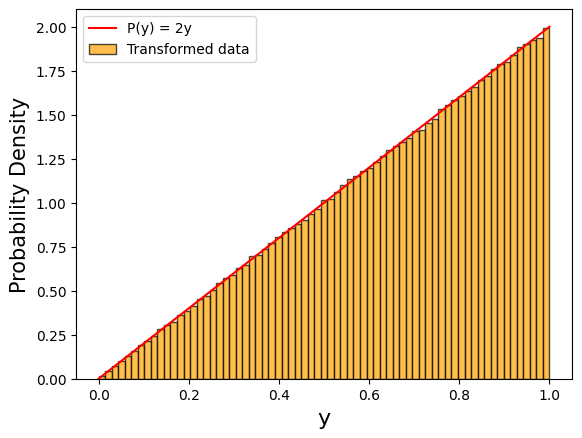

In [50]:
# Generate uniform deviates
x = rng.uniform(0, 1, 1000000)

# Transform the uniform deviates to get a triangular distribution
y = np.sqrt(x)

# Compute the histogram of y
bins = np.linspace(0, 1, 70)
counts, _ = np.histogram(y, bins=bins, density=True)

# Plot the histogram
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Transformed data')

# Compute the triangular distribution function on a finer grid
y_fine = np.linspace(0, 1, 1000)
Pofy = 2*y_fine

# Plot the triangular distribution function
plt.plot(y_fine, Pofy, 'r-', label='P(y) = 2y')

# Add labels and legend
plt.xlabel('y', fontsize=16)
plt.ylabel('Probability Density', fontsize=15)
plt.legend()
plt.show()

Finally, note that even if the integral to determine the CDF cannot be done analytically, it can be done numerically using the `scipy.integrate` module. Under these circumstances you can still use the inverse CDF method to draw random samples from the distribution. Given a numerical expression for ${\rm CDF}(\leq y)$ you perfrom the inversion to obtain ${\rm CDF}^{-1}(x)$ numerically via interpolation. 

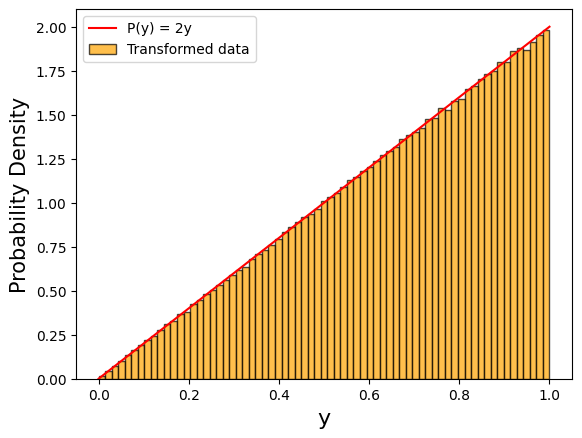

In [22]:
from scipy import integrate
from scipy import interpolate

# Define the triangular distribution
def triangular(y):
    """
    Function to compute the triangular distribution. 
    
    Parameters
    ----------
    y : float or array_like
        The value(s) at which to compute the triangular distribution.
    
    Returns
    -------
    Pofy : float or array_like
        The value(s) of the triangular distribution at y.
    """
    return 2*y if 0 <= y <= 1 else 0

# Compute the CDF(<=y) of the triangular distribution numerically on fine grid
y_values = np.linspace(0, 1, 1000)
cdf_values = [integrate.quad(triangular, 0, y)[0] for y in y_values]

# Generate uniform deviates x
x = np.random.uniform(0, 1, 1000000)

# Create an interpolation function for the inverse CDF
inverse_cdf = interpolate.interp1d(cdf_values, y_values)
# Given a set of x values and y values, the interp1d function 
# returns a function that can be called at any x-values to obtai interpolated 
# y-values.Since we pass in cdf_values as the x-values and y_values as the y-values,
# the returned function is the inverse CDF.

# Use the inverse CDF method to draw random y samples from P(y)
y_samples = inverse_cdf(x)

# Compute the histogram of y_samples
bins = np.linspace(0, 1, 70)
counts, _ = np.histogram(y_samples, bins=bins, density=True)

# Plot the histogram
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Transformed data')

# Compute the triangular distribution function on a finer grid
y_fine = np.linspace(0, 1, 1000)
Pofy = 2*y_fine

# Plot the triangular distribution function
plt.plot(y_fine, Pofy, 'r-', label='P(y) = 2y')

# Add labels and legend
plt.xlabel('y', fontsize=16)
plt.ylabel('Probability Density', fontsize=15)
plt.legend()
plt.show()